# EDA on Credit card transactions.

---



#### Importing libraries

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

#### Importing dataset

In [64]:
df = pd.read_csv('/content/Credit card transactions - India - Simple.csv') #mumbai-blr


# Data Preprocessing🔬

In [65]:
df.head()

,index,City,Date,Card Type,Exp Type,Gender,Amount
0,0,"Delhi, India",29-Oct-14,Gold,Bills,F,82475
1,1,"Greater Mumbai, India",22-Aug-14,Platinum,Bills,F,32555
2,2,"Bengaluru, India",27-Aug-14,Silver,Bills,F,101738
3,3,"Greater Mumbai, India",12-Apr-14,Signature,Bills,F,123424
4,4,"Bengaluru, India",5-May-15,Gold,Bills,F,171574


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26052 entries, 0 to 26051
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   index      26052 non-null  int64 
 1   City       26052 non-null  object
 2   Date       26052 non-null  object
 3   Card Type  26052 non-null  object
 4   Exp Type   26052 non-null  object
 5   Gender     26052 non-null  object
 6   Amount     26052 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 1.4+ MB


In [67]:
df["Month"] = df["Date"].str.split("-").str[1]
df["City Name"] = df["City"].str.split(",").str[0]


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26052 entries, 0 to 26051
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   index      26052 non-null  int64 
 1   City       26052 non-null  object
 2   Date       26052 non-null  object
 3   Card Type  26052 non-null  object
 4   Exp Type   26052 non-null  object
 5   Gender     26052 non-null  object
 6   Amount     26052 non-null  int64 
 7   Month      26052 non-null  object
 8   City Name  26052 non-null  object
dtypes: int64(2), object(7)
memory usage: 1.8+ MB


In [69]:
df.describe()

,index,Amount
count,26052.000000,26052.000000
mean,13025.500000,156411.537425
std,7520.708943,103063.254287
min,0.000000,1005.000000
25%,6512.750000,77120.250000
50%,13025.500000,153106.500000
75%,19538.250000,228050.000000
max,26051.000000,998077.000000


In [70]:
df.isnull().sum()

index        0
City         0
Date         0
Card Type    0
Exp Type     0
Gender       0
Amount       0
Month        0
City Name    0
dtype: int64

In [71]:
df

,index,City,Date,Card Type,Exp Type,Gender,Amount,Month,City Name
0,0,"Delhi, India",29-Oct-14,Gold,Bills,F,82475,Oct,Delhi
1,1,"Greater Mumbai, India",22-Aug-14,Platinum,Bills,F,32555,Aug,Greater Mumbai
2,2,"Bengaluru, India",27-Aug-14,Silver,Bills,F,101738,Aug,Bengaluru
3,3,"Greater Mumbai, India",12-Apr-14,Signature,Bills,F,123424,Apr,Greater Mumbai
4,4,"Bengaluru, India",5-May-15,Gold,Bills,F,171574,May,Bengaluru
...,...,...,...,...,...,...,...,...,...
26047,26047,"Kolkata, India",22-Jun-14,Silver,Travel,F,128191,Jun,Kolkata
26048,26048,"Pune, India",3-Aug-14,Signature,Travel,M,246316,Aug,Pune
26049,26049,"Hyderabad, India",16-Jan-15,Silver,Travel,M,265019,Jan,Hyderabad
26050,26050,"Kanpur, India",14-Sep-14,Silver,Travel,M,88174,Sep,Kanpur


In [72]:
df.shape

(26052, 9)

# Data Visualization

#### Price Distribution

array([<Axes: >], dtype=object)

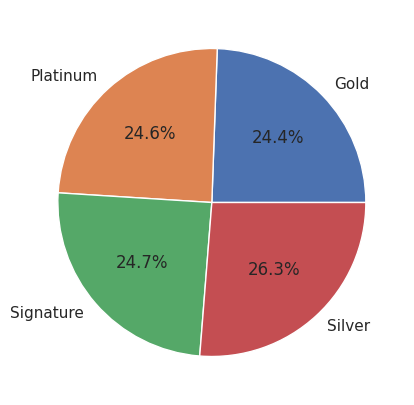

In [73]:
df.groupby("Card Type").size().plot(kind='pie',autopct='%1.1f%%',subplots=True)

Most of the used card is gold while other are neraly same.


array([<Axes: >], dtype=object)

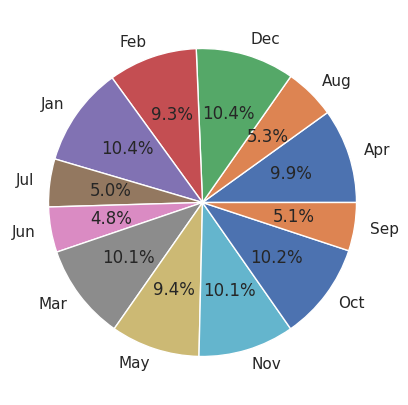

In [74]:
df.groupCredit by("Month").size().plot(kind='pie',autopct='%1.1f%%',subplots=True)

Minimum transactions is in June-Sept month while other are neraly same.

<Axes: xlabel='City Name', ylabel='Amount'>

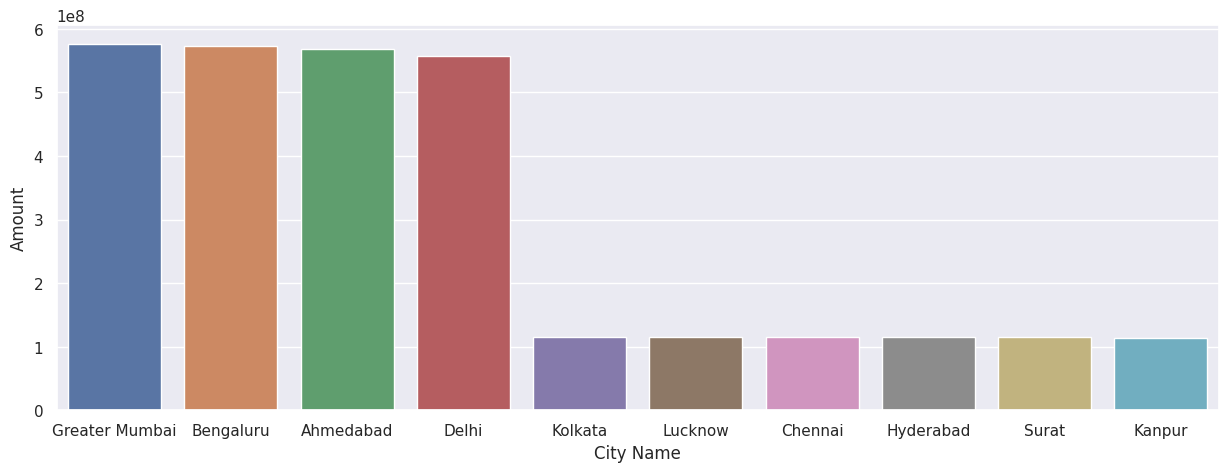

In [75]:
city_trans = df.groupby(['City Name'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
city_trans_bot = df.groupby(['City Name'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=True)
city_trans_top = city_trans.head(10)
city_trans_bot = city_trans_bot.head(10)
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(x = 'City Name' , y= 'Amount' ,data = city_trans_top)


<Axes: xlabel='City Name', ylabel='Amount'>

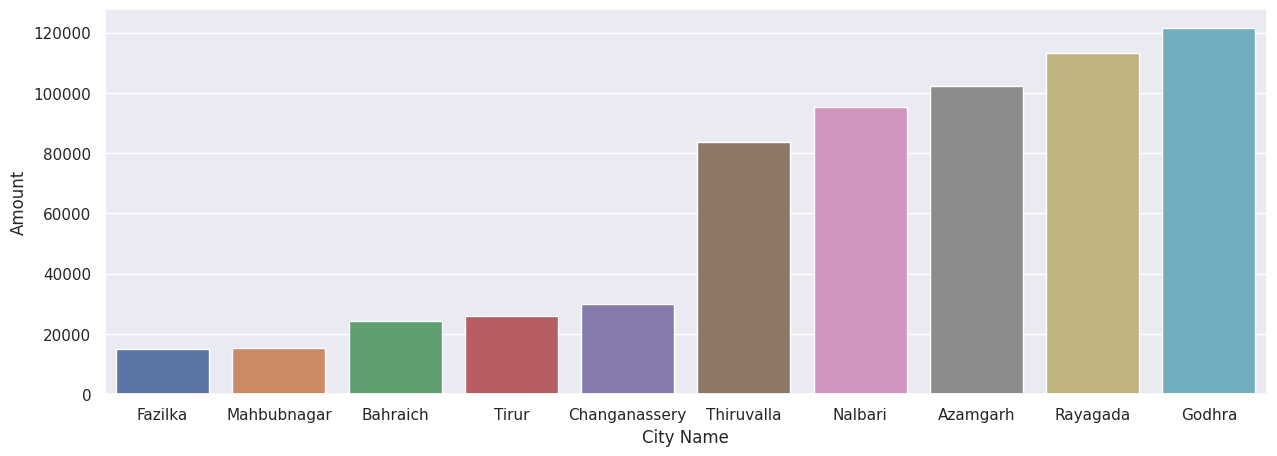

In [76]:
sns.barplot(x = 'City Name' , y= 'Amount' ,data = city_trans_bot)


Here mumbai ahmedabad bangluru and delhi are the city with more transactions rate while Fazika BahraichTirur with min transactions .

array([<Axes: >], dtype=object)

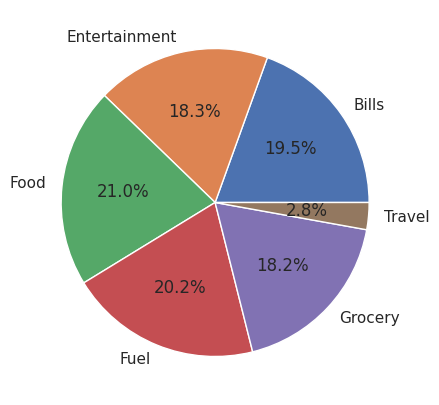

In [77]:
df.groupby("Exp Type").size().plot(kind='pie',autopct='%1.1f%%',subplots=True)

People pay less on travel using credit card .

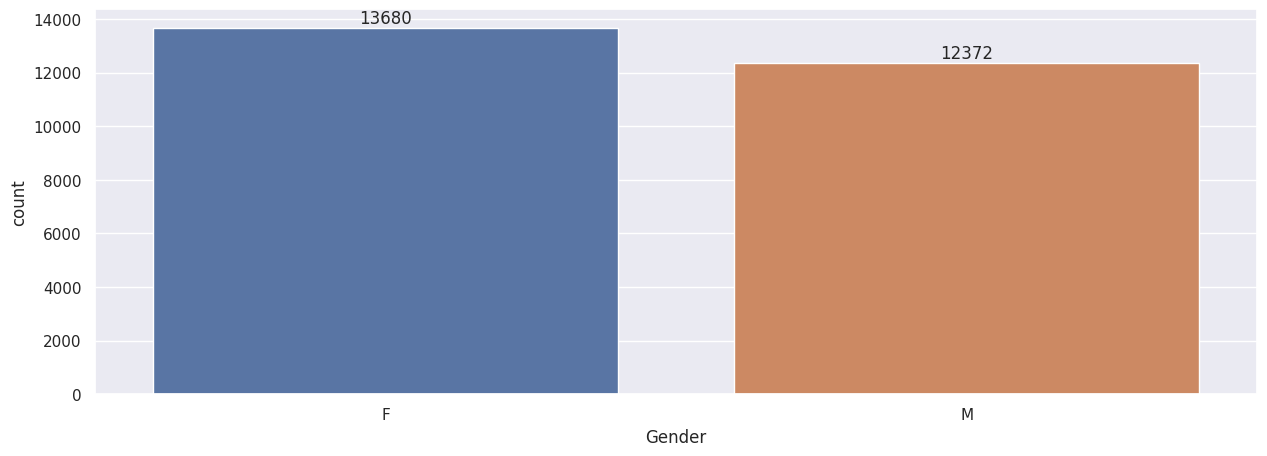

In [78]:
ax = sns.countplot(x = 'Gender',data = df)

for bars in ax.containers:
    ax.bar_label(bars)

Female do more transactions as compared to male.

<Axes: xlabel='Gender', ylabel='Amount'>

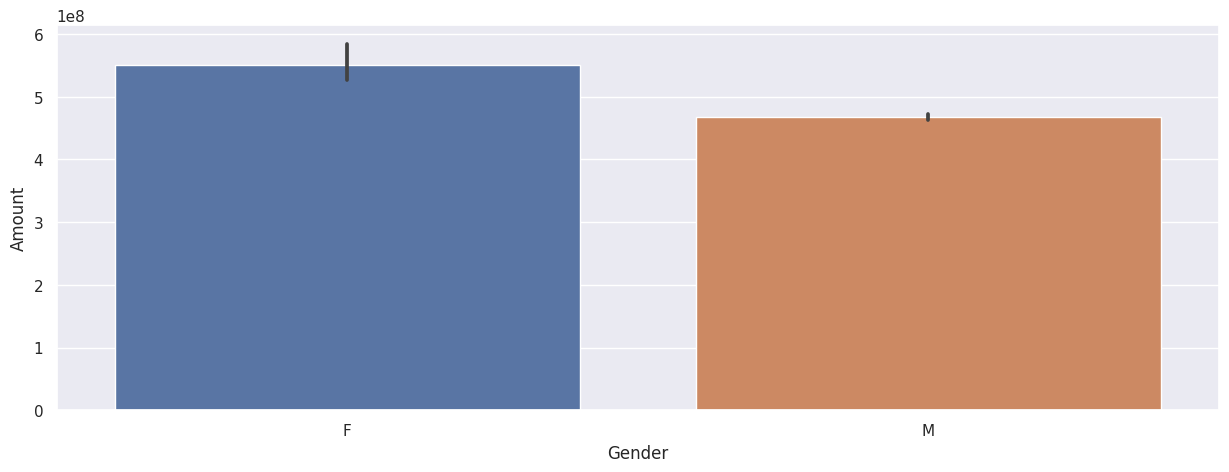

In [79]:
gender_trans = df.groupby(['Gender' , 'Card Type'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.barplot(x='Gender', y='Amount', data=gender_trans)

In [80]:
df

,index,City,Date,Card Type,Exp Type,Gender,Amount,Month,City Name
0,0,"Delhi, India",29-Oct-14,Gold,Bills,F,82475,Oct,Delhi
1,1,"Greater Mumbai, India",22-Aug-14,Platinum,Bills,F,32555,Aug,Greater Mumbai
2,2,"Bengaluru, India",27-Aug-14,Silver,Bills,F,101738,Aug,Bengaluru
3,3,"Greater Mumbai, India",12-Apr-14,Signature,Bills,F,123424,Apr,Greater Mumbai
4,4,"Bengaluru, India",5-May-15,Gold,Bills,F,171574,May,Bengaluru
...,...,...,...,...,...,...,...,...,...
26047,26047,"Kolkata, India",22-Jun-14,Silver,Travel,F,128191,Jun,Kolkata
26048,26048,"Pune, India",3-Aug-14,Signature,Travel,M,246316,Aug,Pune
26049,26049,"Hyderabad, India",16-Jan-15,Silver,Travel,M,265019,Jan,Hyderabad
26050,26050,"Kanpur, India",14-Sep-14,Silver,Travel,M,88174,Sep,Kanpur


Female transactions is more as compared to male.

<Axes: xlabel='Gender', ylabel='Amount'>

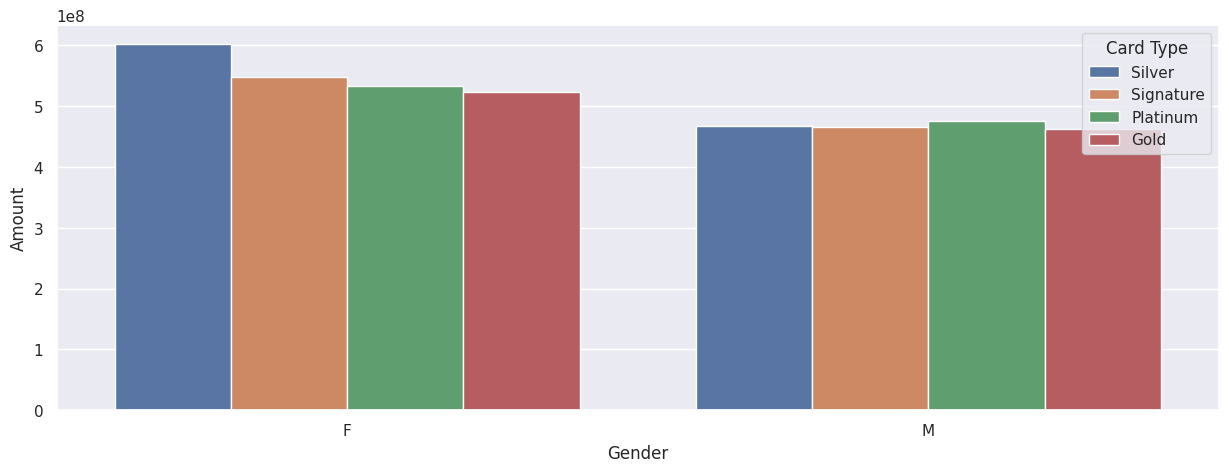

In [81]:
sns.barplot(x='Gender', y='Amount', hue='Card Type', data=gender_trans)

Here female are doing more transactions via silver card while male with platinum card.

# THANK YOU 🙏